In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

## Replacing the Missing Values

In [5]:
import sidetable

In [6]:
df.stb.missing()

,missing,total,percent
Number,1046095,1516064,69.000715
Precipitation(in),510549,1516064,33.675953
Wind_Chill(F),449316,1516064,29.637007
Wind_Speed(mph),128862,1516064,8.499773
Humidity(%),45509,1516064,3.001786
Visibility(mi),44211,1516064,2.916170
Weather_Condition,44007,1516064,2.902714
Temperature(F),43033,1516064,2.838469
Wind_Direction,41858,1516064,2.760965
Pressure(in),36274,1516064,2.392643


In [7]:
df.stb.counts().sort_values('count')

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
Number,469969,37592,1.0,4752,46249.0,1
Precipitation(in),1005515,187,0.0,903429,1.39,1
Wind_Chill(F),1066748,883,57.0,24235,-42.2,1
Wind_Speed(mph),1387202,121,0.0,202877,110.0,1
Humidity(%),1470555,100,93.0,58126,1.0,11
Visibility(mi),1471853,74,10.0,1178150,19.0,1
Weather_Condition,1472057,116,Fair,465252,Hail,1
Temperature(F),1473031,775,59.0,32387,-15.3,1
Wind_Direction,1474206,24,CALM,202870,Variable,23038
Pressure(in),1479790,1007,29.96,25265,31.14,1


<AxesSubplot:xlabel='Start_Lat', ylabel='End_Lat'>

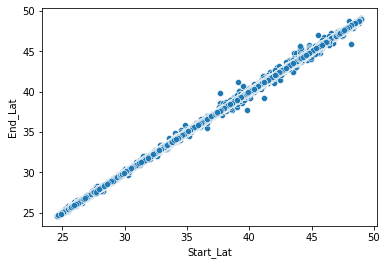

In [8]:
sns.scatterplot(x='Start_Lat', y='End_Lat', data = df)

<AxesSubplot:xlabel='Start_Lng', ylabel='End_Lng'>

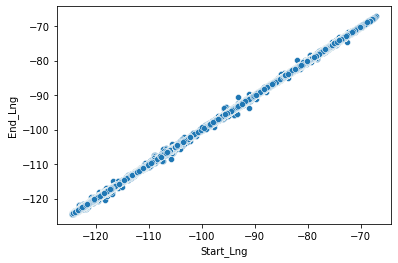

In [9]:
sns.scatterplot(x='Start_Lng', y='End_Lng', data = df)

In [10]:
object_col = df.columns[df.dtypes == 'object']

In [11]:
#Convert object dtype to category
df[object_col] = df[object_col].astype('category')

In [12]:
df.drop(['End_Lat','End_Lng','Country','Turning_Loop','Number','Precipitation(in)','Wind_Chill(F)'], axis = 1, inplace = True)

In [13]:
df.dtypes

ID                       category
Severity                    int64
Start_Time               category
End_Time                 category
Start_Lat                 float64
Start_Lng                 float64
Distance(mi)              float64
Description              category
Street                   category
Side                     category
City                     category
County                   category
State                    category
Zipcode                  category
Timezone                 category
Airport_Code             category
Weather_Timestamp        category
Temperature(F)            float64
Humidity(%)               float64
Pressure(in)              float64
Visibility(mi)            float64
Wind_Direction           category
Wind_Speed(mph)           float64
Weather_Condition        category
Amenity                      bool
Bump                         bool
Crossing                     bool
Give_Way                     bool
Junction                     bool
No_Exit       

In [14]:
num_missing = df[df.columns[df.isna().sum() != 0]]
num_missing = num_missing.columns[num_missing.dtypes == 'float64']
num_missing

Index(['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)'],
      dtype='object')

In [15]:
#replacing the null value by mean for the numerical columns

for i in num_missing:
    df[i].fillna(df[i].mean(), inplace = True)

In [16]:
str_missing = df[df.columns[df.isna().sum() != 0]]
str_missing = str_missing.columns[(str_missing.dtypes == 'category') | (str_missing.dtypes == 'object')]
str_missing

Index(['City', 'Zipcode', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [17]:
#replacing the null value by mode for the categorical columns

for i in str_missing:
    df[i].fillna(df[i].value_counts().index[0], inplace = True)

In [18]:
df.isna().sum().sum()

0

### Exploratory Analysis and Visualisation

In [19]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [20]:
df2 = df[['Start_Time']].copy()         #See on google why use .copy()
                                        #Double square brackets create a dataframe instead of series

In [21]:
df2['Day'] = df2['Start_Time'].dt.day
df2['Month'] = df2['Start_Time'].dt.month
df2['Year'] = df2['Start_Time'].dt.year
df2['Weekday'] = df2['Start_Time'].dt.weekday
df2['Hour'] = df2['Start_Time'].dt.hour

In [22]:
df2.head()

,Start_Time,Day,Month,Year,Weekday,Hour
0,2016-02-08 00:37:08,8,2,2016,0,0
1,2016-02-08 05:56:20,8,2,2016,0,5
2,2016-02-08 06:15:39,8,2,2016,0,6
3,2016-02-08 06:15:39,8,2,2016,0,6
4,2016-02-08 06:51:45,8,2,2016,0,6


C:\Users\Ayush Gourisaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Accidents per Hour of the Day')

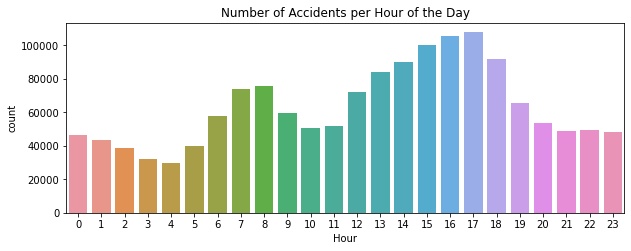

In [23]:
plt.figure(figsize = (10,3.5))
sns.countplot(df2.Hour)
plt.title('Number of Accidents per Hour of the Day')

C:\Users\Ayush Gourisaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Accidents per Day of the Week')

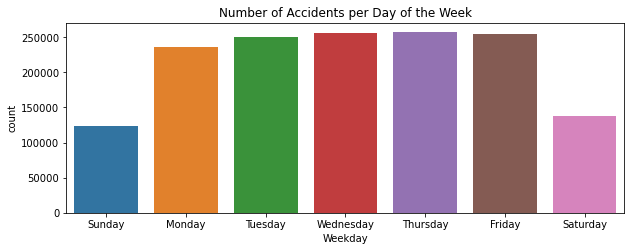

In [24]:
plt.figure(figsize = (10,3.5))
sns.countplot(df2.Weekday.replace([0,1,2,3,4,5,6],['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                   'Saturday','Sunday']), 
              order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.title('Number of Accidents per Day of the Week')

C:\Users\Ayush Gourisaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Accidents per Day')

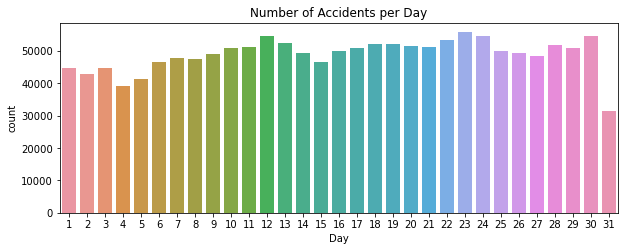

In [25]:
plt.figure(figsize = (10,3.5))
sns.countplot(df2.Day)
plt.title('Number of Accidents per Day')

C:\Users\Ayush Gourisaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Accidents per Month')

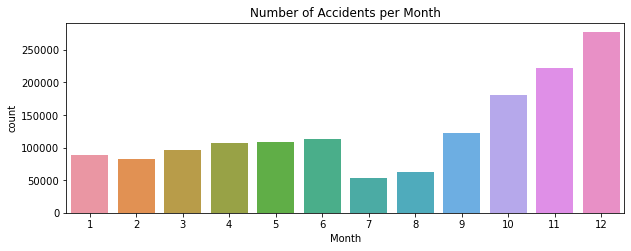

In [26]:
plt.figure(figsize = (10,3.5))
sns.countplot(df2.Month)
plt.title('Number of Accidents per Month')

C:\Users\Ayush Gourisaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Accidents per Year')

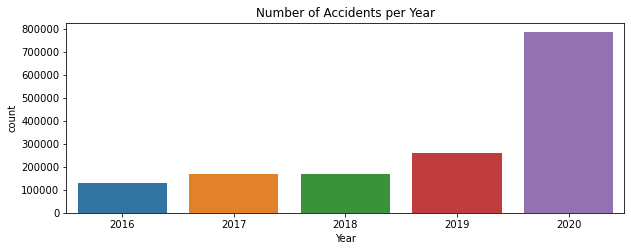

In [27]:
plt.figure(figsize = (10,3.5))
sns.countplot(df2.Year)
plt.title('Number of Accidents per Year')

In [28]:
#States where maximum number of Accidents have occurred

In [29]:
df.State.value_counts()

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
MN     52345
VA     51198
NC     50159
PA     42844
IL     41709
MD     35320
UT     33218
GA     31111
AZ     30185
NJ     29850
SC     28090
MI     27775
WA     22999
OH     22044
TN     21874
CO     19809
LA     19250
MO     16949
CT     15194
IN     11736
AL      9375
WI      7919
MA      6121
KY      5671
OK      5592
KS      5146
IA      4780
AR      4373
ID      4061
NH      3826
DC      3788
RI      3766
NV      3681
MT      3306
WV      3242
MS      2790
DE      2331
ME      2202
NE      2178
NM      1467
ND       455
VT       352
WY       330
SD       213
Name: State, dtype: int64

C:\Users\Ayush Gourisaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Accidents by State')

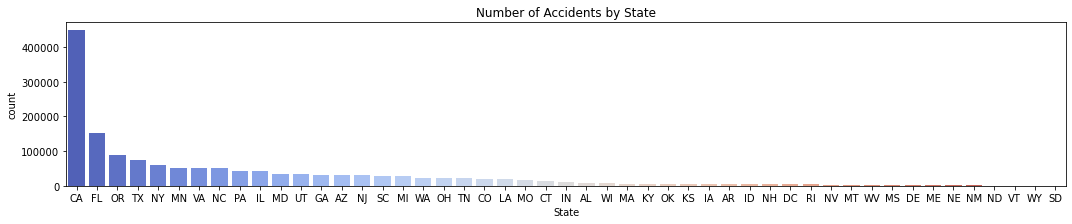

In [30]:
plt.figure(figsize = (15,3))
sns.countplot(df.State, order = df.State.value_counts().index, palette = 'coolwarm')
plt.tight_layout()
plt.title('Number of Accidents by State')

In [31]:
lat_lng = df.groupby(["Start_Lat","Start_Lng"]).count()['Severity'].copy()     #Why .copy() is in last??
lat_lng.sort_values(ascending = False, inplace = True)

In [32]:
lat_lng

Start_Lat  Start_Lng  
25.823117  -80.206385     246
40.853060  -73.960110     243
25.910063  -80.210076     220
45.580470  -122.543580    181
41.797330  -71.403560     149
                         ... 
36.024636  -78.509842       1
36.024531  -118.810423      1
36.024527  -83.469619       1
36.024480  -78.479630       1
49.000580  -116.181070      1
Name: Severity, Length: 643251, dtype: int64

In [33]:
df[(df.Start_Lat == lat_lng.index[0][0]) | (df.Start_Lng == lat_lng.index[0][1])].State.iloc[0]

'FL'

C:\Users\Ayush Gourisaria\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sunrise_Sunset', ylabel='count'>

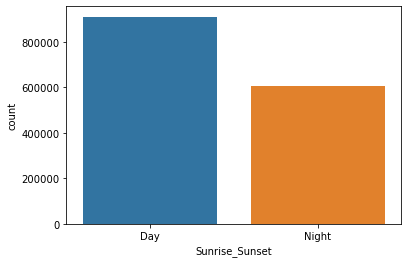

In [34]:
sns.countplot(df['Sunrise_Sunset'])

In [35]:
by_weather = df['Weather_Condition'].value_counts()[df['Weather_Condition'].value_counts()>5000]

Text(0.5, 1.0, 'Accidents caused frequently under these Weather Conditions')

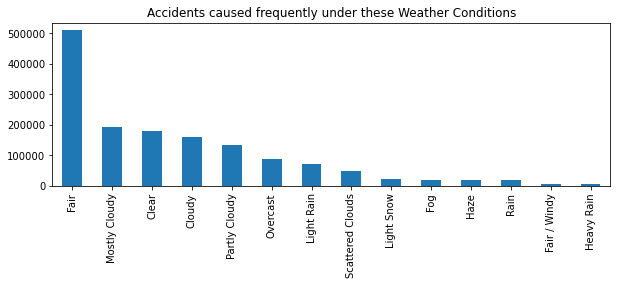

In [36]:
plt.figure(figsize = (10,3))
by_weather.plot(kind = 'bar')
plt.title('Accidents caused frequently under these Weather Conditions')

### Deleting Unnecessary Columns

In [37]:
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 40 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   ID                     1516064 non-null  category      
 1   Severity               1516064 non-null  int64         
 2   Start_Time             1516064 non-null  datetime64[ns]
 3   End_Time               1516064 non-null  datetime64[ns]
 4   Start_Lat              1516064 non-null  float64       
 5   Start_Lng              1516064 non-null  float64       
 6   Distance(mi)           1516064 non-null  float64       
 7   Description            1516064 non-null  category      
 8   Street                 1516064 non-null  category      
 9   Side                   1516064 non-null  category      
 10  City                   1516064 non-null  category      
 11  County                 1516064 non-null  category      
 12  State                  15160

In [39]:
duration = df.End_Time - df.Start_Time

In [40]:
duration

0         0 days 06:00:00
1         0 days 06:00:00
2         0 days 06:00:00
3         0 days 06:00:00
4         0 days 06:00:00
                ...      
1516059   0 days 00:28:36
1516060   0 days 00:26:53
1516061   0 days 00:28:28
1516062   0 days 00:29:21
1516063   0 days 00:29:25
Length: 1516064, dtype: timedelta64[ns]

In [41]:
#DURATION OF AFTERMATH OF THE ACCIDENT
df['Duration'] = duration.apply(lambda a: a.components.days*24 + a.components.hours+ a.components.minutes/60)

In [42]:
df.drop(['ID', 'Description','Start_Time', 'End_Time', 'Street', 'City', 'County', 'State', 'Zipcode', 'Weather_Timestamp',
         'Timezone', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],axis = 1, inplace = True)

In [43]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Duration
0,3,40.10891,-83.09286,3.230,R,42.1,58.0,29.76,10.0,SW,...,False,False,False,False,False,False,False,False,Night,6.0
1,2,39.86542,-84.06280,0.747,R,36.9,91.0,29.68,10.0,Calm,...,False,False,False,False,False,False,False,False,Night,6.0
2,2,39.10266,-84.52468,0.055,R,36.0,97.0,29.70,10.0,Calm,...,True,False,False,False,False,False,False,False,Night,6.0
3,2,39.10148,-84.52341,0.219,R,36.0,97.0,29.70,10.0,Calm,...,True,False,False,False,False,False,False,False,Night,6.0
4,2,41.06213,-81.53784,0.123,R,39.0,55.0,29.65,10.0,Calm,...,False,False,False,False,False,False,False,False,Night,6.0


In [44]:
df.Side.unique()

['R', 'L']
Categories (2, object): ['R', 'L']

In [45]:
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Severity           5 non-null      int64   
 1   Start_Lat          5 non-null      float64 
 2   Start_Lng          5 non-null      float64 
 3   Distance(mi)       5 non-null      float64 
 4   Side               5 non-null      category
 5   Temperature(F)     5 non-null      float64 
 6   Humidity(%)        5 non-null      float64 
 7   Pressure(in)       5 non-null      float64 
 8   Visibility(mi)     5 non-null      float64 
 9   Wind_Direction     5 non-null      category
 10  Wind_Speed(mph)    5 non-null      float64 
 11  Weather_Condition  5 non-null      category
 12  Amenity            5 non-null      bool    
 13  Bump               5 non-null      bool    
 14  Crossing           5 non-null      bool    
 15  Give_Way           5 non-null      bool    
 16  Junction    

In [46]:
bool_col = df.dtypes[df.dtypes == 'bool'].index

In [47]:
for i in bool_col:
    df['{}_True'.format(i)] = df[i].apply(lambda a: int(a))

In [48]:
df.drop(bool_col, axis = 1, inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   Severity              1516064 non-null  int64   
 1   Start_Lat             1516064 non-null  float64 
 2   Start_Lng             1516064 non-null  float64 
 3   Distance(mi)          1516064 non-null  float64 
 4   Side                  1516064 non-null  category
 5   Temperature(F)        1516064 non-null  float64 
 6   Humidity(%)           1516064 non-null  float64 
 7   Pressure(in)          1516064 non-null  float64 
 8   Visibility(mi)        1516064 non-null  float64 
 9   Wind_Direction        1516064 non-null  category
 10  Wind_Speed(mph)       1516064 non-null  float64 
 11  Weather_Condition     1516064 non-null  category
 12  Sunrise_Sunset        1516064 non-null  category
 13  Duration              1516064 non-null  float64 
 14  Amenity_True      

In [50]:
df = pd.get_dummies(df, drop_first = True, dtype = 'int64')

In [51]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Duration,...,Weather_Condition_Thunder and Hail / Windy,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Tornado,Weather_Condition_Volcanic Ash,Weather_Condition_Widespread Dust,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Night
0,3,40.10891,-83.09286,3.230,42.1,58.0,29.76,10.0,10.400000,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2,39.86542,-84.06280,0.747,36.9,91.0,29.68,10.0,7.630812,6.0,...,0,0,0,0,0,0,0,0,0,1
2,2,39.10266,-84.52468,0.055,36.0,97.0,29.70,10.0,7.630812,6.0,...,0,0,0,0,0,0,0,0,0,1
3,2,39.10148,-84.52341,0.219,36.0,97.0,29.70,10.0,7.630812,6.0,...,0,0,0,0,0,0,0,0,0,1
4,2,41.06213,-81.53784,0.123,39.0,55.0,29.65,10.0,7.630812,6.0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

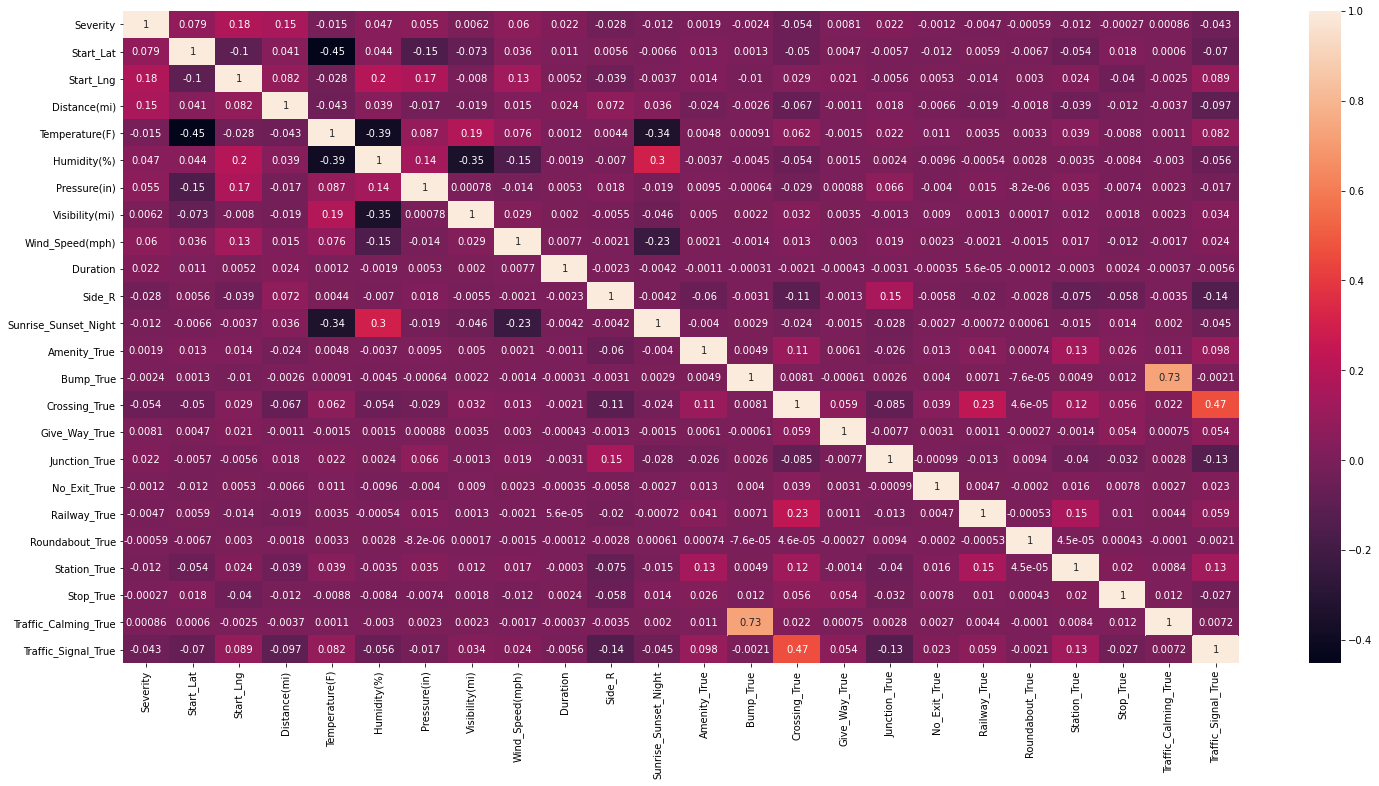

In [54]:
plt.figure(figsize = (25,12))
sns.heatmap(df3.corr(), annot = True)

### Machine Learning Model to predict the Location

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
y = df[['Start_Lat', 'Start_Lng']]
X = df.drop(['Start_Lat', 'Start_Lng'], axis = 1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [65]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [66]:
lr_lat = LinearRegression()
lr_lng = LinearRegression()
ls_lat = Lasso()
ls_lng = Ridge()

In [67]:
lr_lat.fit(X_train, y_train.Start_Lat)

LinearRegression()

In [59]:
pred = lr_lat.predict(X_test)

In [68]:
lr_lat.score(X_train, y_train.Start_Lat)

0.30165172925680206

In [ ]:
from sklearn.metrics import r2_score